# U~V 데이터 분석

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [37]:
import os
if os.name == 'posix':
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt':
    plt.rc('font', family='Malgum Gothic')

plt.rc('axes', unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

## 2017, 2018년 데이터 각각 가져오기

In [38]:
data1 = pd.read_csv('NHIS_OPEN_GJ_2017_100.csv', encoding='euc-kr')
data2 = pd.read_csv('NHIS_OPEN_GJ_2018_100.csv')

In [39]:
data1.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [40]:
data1.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,0.0,1,NaN,NaN,NaN,NaN,2.0,20181126
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126


In [41]:
data2.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2018,1,2,7,48,160,60,79.5,1.5,1.5,...,12.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219
1,2018,2,1,6,26,170,55,69.3,1.2,0.8,...,47.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219
2,2018,3,1,12,28,165,70,85.0,0.8,0.8,...,21.0,2.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219
3,2018,4,2,15,27,150,45,71.5,0.4,0.3,...,13.0,1.0,NaN,1,0.0,NaN,NaN,NaN,0.0,20191219
4,2018,5,2,14,41,145,50,77.0,0.7,0.6,...,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219


In [42]:
data1 = data1[['요단백','혈청크레아티닌']]
data2 = data2[['요단백','혈청크레아티닌']]

In [43]:
data1.head()

,요단백,혈청크레아티닌
0,1.0,1.0
1,1.0,0.9
2,1.0,0.9
3,1.0,1.1
4,1.0,0.8


In [44]:
data2.head()

,요단백,혈청크레아티닌
0,1.0,0.5
1,1.0,1.0
2,NaN,1.1
3,1.0,0.6
4,1.0,0.5


## Null값 개수 확인

In [45]:
data1.isnull().sum()

요단백        4592
혈청크레아티닌      43
dtype: int64

In [46]:
data2.isnull().sum()

요단백        10570
혈청크레아티닌     5906
dtype: int64

## 각 항목의 최대, 최소, 평균값

### 요단백

In [47]:
print("2017")
print("요단백 최댓값 :", data1['요단백'].max())
print("요단백 최솟값 :", data1['요단백'].min())
print("요단백 평균값 :", data1['요단백'].mean())

print("\n2018")
print("요단백 최댓값 :", data2['요단백'].max())
print("요단백 최솟값 :", data2['요단백'].min())
print("요단백 평균값 :", data2['요단백'].mean())

2017
요단백 최댓값 : 6.0
요단백 최솟값 : 1.0
요단백 평균값 : 1.09442158391333

2018
요단백 최댓값 : 6.0
요단백 최솟값 : 1.0
요단백 평균값 : 1.097213547193839


실제 메뉴얼에서 요단백의 수치는 1~6 으로 산정. 정상인의 경우 수치가 1인 것을 고려했을 때 두 데이터에서 모두 적당한 평균값이 나왔다.

In [48]:
print("요단백 4 :", len(data1[data1['요단백'] == 4]['요단백']))
print("요단백 5 :",len(data1[data1['요단백'] == 5]['요단백']))
print("요단백 6 :",len(data1[data1['요단백'] == 6]['요단백']))

요단백 4 : 6466
요단백 5 : 1992
요단백 6 : 515


이 사람들은 정상인들에 비해 꽤 많은 단백뇨가 검출 되었다. 당뇨병의 합병증으로 의심해볼만 하다.

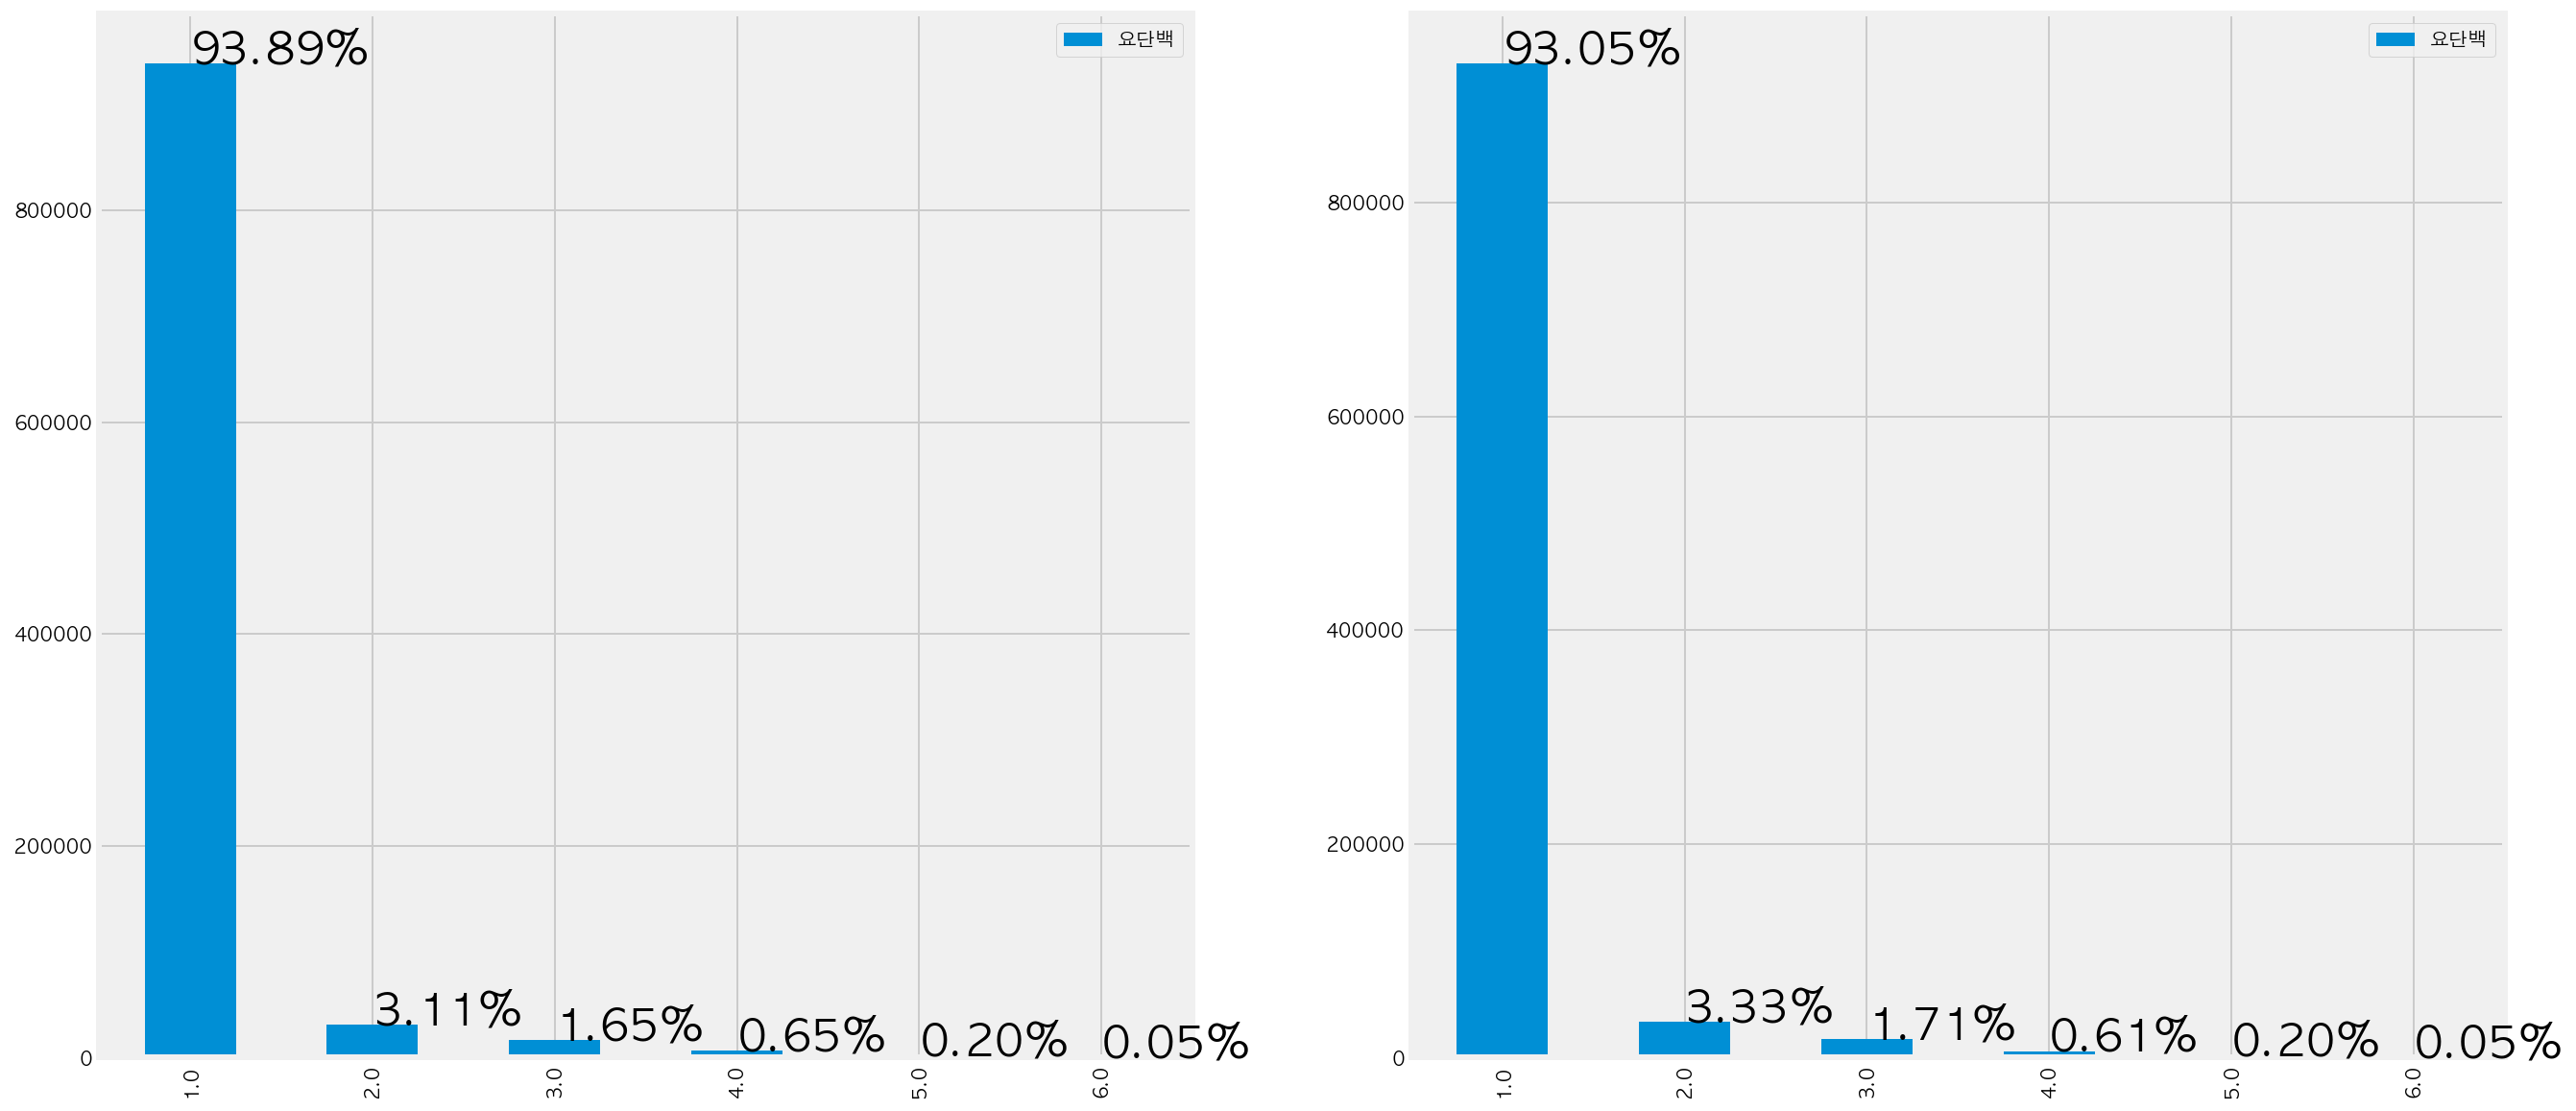

In [49]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt_data1 = data1['요단백'].value_counts()
plt_data2 = data2['요단백'].value_counts()
plt_data1 = pd.DataFrame(plt_data1)
plt_data2 = pd.DataFrame(plt_data2)
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
plt_data1.plot.bar(ax=ax1)
plt_data2.plot.bar(ax=ax2)
index = 0
for x in plt_data1['요단백']:
    percent = "{:.2f}".format((x/1000000)*100)
    ax1.text(index, x+0.2, str(percent)+"%", size=23)
    index += 1
index = 0
for x in plt_data2['요단백']:
    percent = "{:.2f}".format((x/1000000)*100)
    ax2.text(index, x, str(percent)+"%", size=23)
    index += 1
plt.show()


요단백의 경우 전체 데이터의 약 1% 정도 Null 값이 존재한다는 사실 외에 특이수치는 존재하지 않는다. Null 값을 제거하거나 평균치로 채우는 것이 좋겠다.

### 혈청크레아티닌

In [50]:
print("2017")
print("혈청크레아티닌 최댓값 :", data1['혈청크레아티닌'].max())
print("혈청크레아티닌 최솟값 :", data1['혈청크레아티닌'].min())
print("혈청크레아티닌 평균값 :", data1['혈청크레아티닌'].mean())

print("\n2018")
print("혈청크레아티닌 최댓값 :", data2['혈청크레아티닌'].max())
print("혈청크레아티닌 최솟값 :", data2['혈청크레아티닌'].min())
print("혈청크레아티닌 평균값 :", data2['혈청크레아티닌'].mean())

2017
혈청크레아티닌 최댓값 : 98.0
혈청크레아티닌 최솟값 : 0.1
혈청크레아티닌 평균값 : 0.862169473287351

2018
혈청크레아티닌 최댓값 : 97.0
혈청크레아티닌 최솟값 : 0.1
혈청크레아티닌 평균값 : 0.8644423967954736


혈청크레아티닌의 경우 정상치가 0.8 ~ 1.7이다. 혈청 크레아티닌은 근육량에 비례하는데 0.1이라고 하면 거의 나무늘보가 아닌가 싶다. 또 98이라는 수치가 발견되었는데 저것이 사실이라면 지구의 생태계가 심히 걱정된다.

In [51]:
Weird_Creatinine1 = data1[data1['혈청크레아티닌'] >= 3]
Weird_Creatinine11 = data1[data1['혈청크레아티닌'] <= 0.2]
Weird_Creatinine1 = Weird_Creatinine1['혈청크레아티닌']
Weird_Creatinine11 = Weird_Creatinine11['혈청크레아티닌']
print("과하게 높은 데이터 수:", len(Weird_Creatinine1))
print("과하게 낮은 데이터 수:", len(Weird_Creatinine11))

과하게 높은 데이터 수: 1214
과하게 낮은 데이터 수: 532


In [52]:
Weird_Creatinine2 = data2[data2['혈청크레아티닌'] >= 3]
Weird_Creatinine22 = data2[data2['혈청크레아티닌'] <= 0.2]
Weird_Creatinine2 = Weird_Creatinine2['혈청크레아티닌']
Weird_Creatinine22 = Weird_Creatinine22['혈청크레아티닌']
print("과하게 높은 데이터 수:", len(Weird_Creatinine2))
print("과하게 낮은 데이터 수:", len(Weird_Creatinine22))

과하게 높은 데이터 수: 1249
과하게 낮은 데이터 수: 328


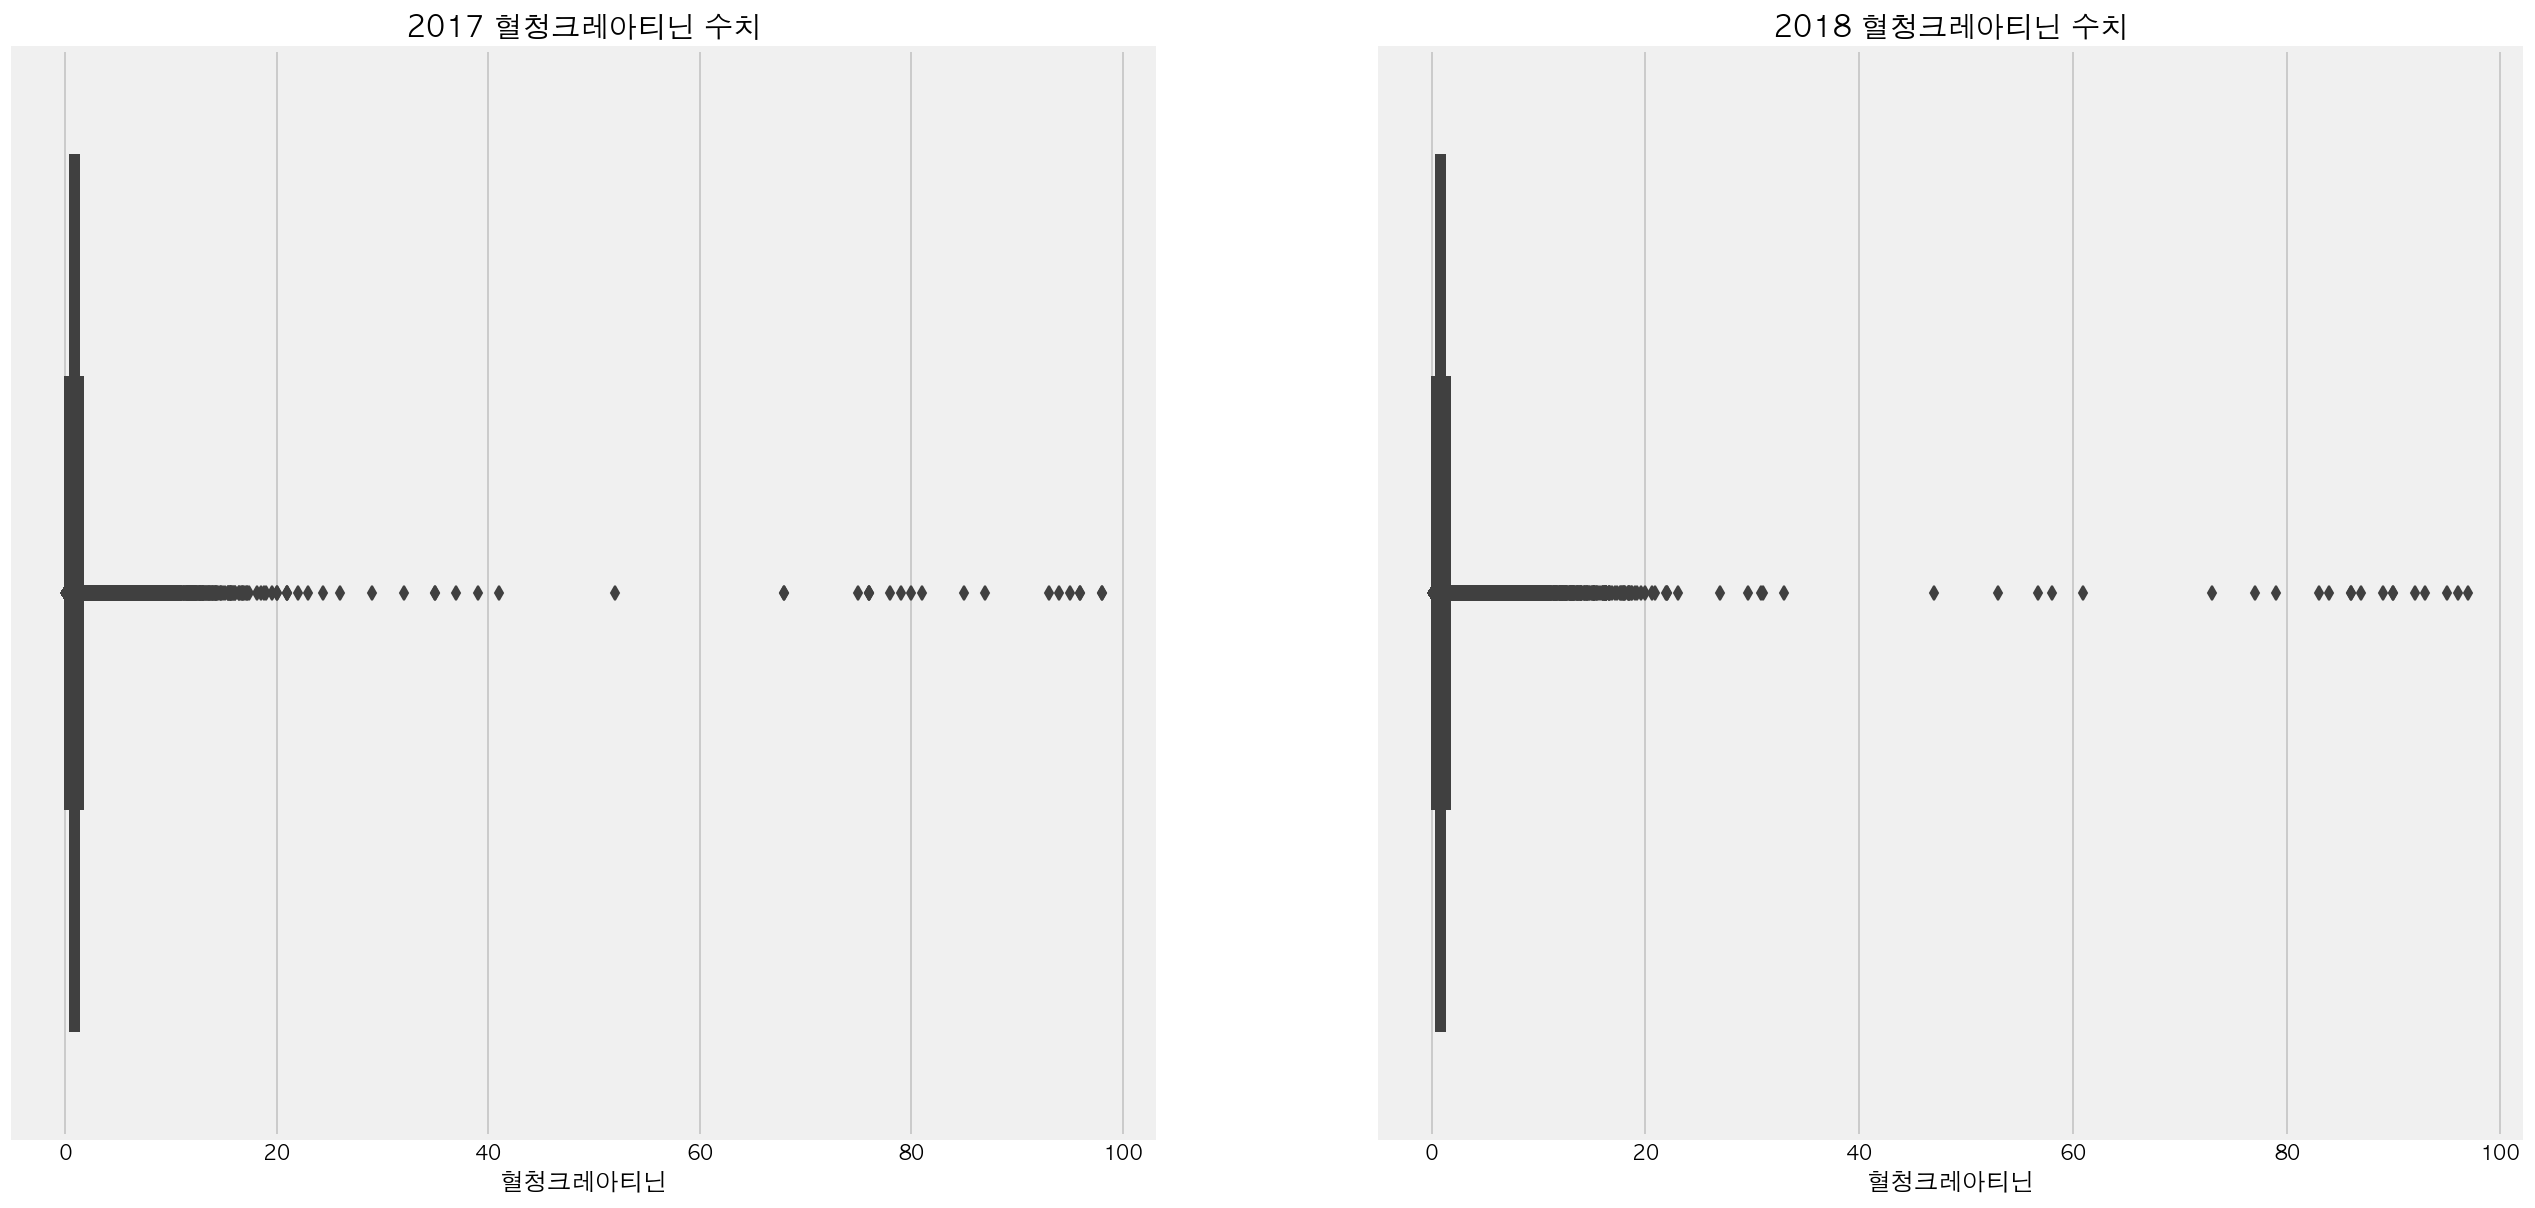

In [53]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.boxplot(x="혈청크레아티닌", data=data1, ax=ax[0])
ax[0].set_title("2017 혈청크레아티닌 수치")
sns.boxplot(x="혈청크레아티닌", data=data2, ax=ax[1])
ax[1].set_title("2018 혈청크레아티닌 수치")
plt.show()

이상 수치의 수가 전체 데이터의 1% 미만이다. 이정도면 제거해줘도 되지 않을까?